In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test_pandas.csv')
# Загрузаем файл

In [6]:
df.info()
# Изучаем файл

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79524 entries, 0 to 79523
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            79524 non-null  int64  
 1   price_per_job  79524 non-null  float64
 2   jobs_made      79524 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.8 MB


In [8]:
df.head()
# Просматриваю его

,uid,price_per_job,jobs_made
0,3,0.03,1
1,3,0.10,2
2,3,0.10,2
3,3,0.15,1
4,3,1.00,4


1) получить ведомость оплаты: id - сумма

In [65]:
df['sum_payment'] = df['price_per_job']*df['jobs_made']
df
# Создаю столбец с суммой оплаты 

,uid,price_per_job,jobs_made,sum_payment
0,3,0.03,1,0.03
1,3,0.10,2,0.20
2,3,0.10,2,0.20
3,3,0.15,1,0.15
4,3,1.00,4,4.00
...,...,...,...,...
79519,116071,0.20,46,9.20
79520,117313,0.20,58,11.60
79521,156275,0.20,53,10.60
79522,156277,0.20,28,5.60


In [74]:
payment_statement = df[['uid', 'sum_payment']].groupby('uid').sum().reset_index()
payment_statement
# группирую и суммирую по каждому uid 

,uid,sum_payment
0,3,8.88
1,5,100.10
2,35,31553.60
3,67,40.70
4,68,170.35
...,...,...
2619,270276,32.90
2620,270277,2.30
2621,270282,5.05
2622,270290,2.90


In [76]:
payment_statement.value_counts()
# Проверка

uid     sum_payment
270294  41.70          1
240194  71.30          1
240134  10.85          1
240054  275.85         1
240014  475.70         1
                      ..
264554  1025.50        1
264524  1028.30        1
264497  1.40           1
264466  0.20           1
3       8.88           1
Length: 2624, dtype: int64

2) найти id, которые заработали больше других и в сумме заработали 60% денег

In [83]:
f = sum(payment_statement['sum_payment'])*0.6
f
# узнаю 60 % от бощей суммы

1108815.2579999994

In [84]:
df_sort = payment_statement.sort_values('sum_payment', ascending=False)
df_sort
# Сортирую по убыванию

,uid,sum_payment
7,196,47352.45
52,6239,44430.40
51,6236,43515.20
34,2901,41027.75
90,112445,32218.40
...,...,...
2260,268684,0.10
706,226155,0.10
1668,263239,0.10
1826,265616,0.10


In [90]:
sum60 = 0
k = 0
for i in df_sort['sum_payment']:
    sum60 += i
    k += 1
    if sum60 >= f:
        break

df_sort[:k].head()
# Создаю цикл в котором суммирую все значения sum_payment отсортированные по убыванию, пока сумма не будет больше f

,uid,sum_payment
7,196,47352.45
52,6239,44430.40
51,6236,43515.20
34,2901,41027.75
90,112445,32218.40


3) предложить свой метод поиска тех, кто заработал слишком много, с целью обнаружить неточность / подлог в исходных данных.

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
payment_statement.describe()
# Общая информация о df

,uid,sum_payment
count,2624.000000,2624.000000
mean,233985.368902,704.277984
std,53878.617179,2774.684654
min,3.000000,0.100000
25%,222367.000000,10.650000
50%,256803.500000,65.825000
75%,266814.250000,413.587500
max,270294.000000,47352.450000


<AxesSubplot:>

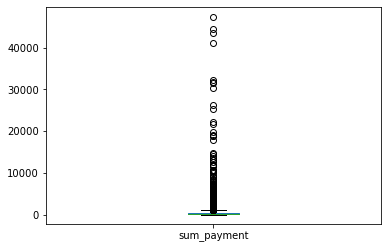

In [137]:
payment_statement.sum_payment.plot(kind='box')

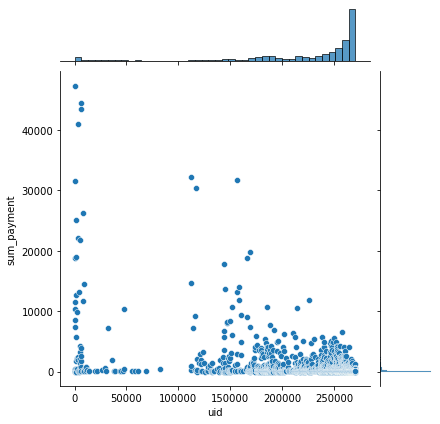

In [138]:
sns.jointplot(x='uid', y='sum_payment', 
              data=payment_statement, kind='scatter')

По графикам мы уже можем сказать что все точки которые находятся выше 500 по y, являюся выбросами.

А теперь найдем выбросы через межквартльный размах

In [150]:
q1 = payment_statement.sum_payment.quantile(0.25)
q3 = payment_statement.sum_payment.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = payment_statement[payment_statement.sum_payment.between(lower_bound, upper_bound, inclusive=True)].sort_values('sum_payment')
remove_outliers

,uid,sum_payment
1826,265616,0.10
1791,265308,0.10
2554,270013,0.10
2193,268243,0.10
1863,266031,0.10
...,...,...
1389,259040,995.60
319,181860,998.15
1333,257235,1000.05
1561,261292,1000.65
